# Artificial Neural Networks for Binary Classification Exercise

In this notebook we will build an ANN to predict whether customers will churn (indicated by the column `Churn`).


## Dataset
- **Source**: [Kaggle](https://www.kaggle.com/datasets/ahmedgaitani/customer-churn-prediction-dataset/data).
- **Variables of Interest**:
  - `Churn`
- As for the data card you should be able by now to figure the data out by your self :)

## Preprocessing Steps

1. **Dropping irrelevant columns**
2. **Encoding categorical variables**
3. **Data Splitting**

## Model Architecture

- **Input Layer**: Please specify here (the trainee should this this)
- **Hidden Layers**: Please specify here (the trainee should fill this)
- **Output Layer**: Please specify here (the trainee should fill this)

## Training

- **Optimizer**: Please specify here (the trainee should fill this)
- **Loss Function**: Please specify here (the trainee should fill this)
- **Metrics**: Please specify here (the trainee should fill this)
- **Epochs**: Please specify here (the trainee should fill this)
- **Batch Size**: Please specify here (the trainee should fill this)
- **Validation Split**: Please specify here (the trainee should fill this)

## Evaluation
- Please specify here (the trainee should fill this)

If you need to change the steps or add more please do so and explain why!

# Import libraries

In [268]:
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [269]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load Data and EDA

In [271]:
dataset = pd.read_csv('Churn_Modelling_Exercise.csv')
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0296-XXXX,Female,1,No,Yes,61,No,Yes,DSL,No,...,Yes,No internet service,No,No,One year,Yes,Electronic check,42.52,2593.72,No
296,0297-XXXX,Female,0,No,No,49,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,22.31,1093.19,Yes
297,0298-XXXX,Male,0,No,Yes,71,Yes,Yes,DSL,No internet service,...,Yes,Yes,No,Yes,Two year,No,Mailed check,59.57,4229.47,Yes
298,0299-XXXX,Male,1,Yes,Yes,1,Yes,Yes,No,Yes,...,No internet service,No internet service,Yes,Yes,Two year,No,Credit card,31.32,31.32,No


In [272]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [273]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [274]:
dataset.shape

(300, 21)

In [275]:
# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Identify numerical columns
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

In [276]:
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [277]:
print("\nNumerical Columns:")
print(numerical_columns)


Numerical Columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [278]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000,300.000000
mean,0.543333,35.783333,67.226800,2477.975767
std,0.498951,21.113400,28.638073,1918.540111
min,0.000000,1.000000,18.450000,30.030000
25%,0.000000,17.000000,42.337500,910.302500
50%,1.000000,36.000000,68.635000,2072.400000
75%,1.000000,53.250000,92.430000,3618.405000
max,1.000000,72.000000,118.640000,8318.880000


In [279]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [280]:
dataset.duplicated().sum()

0

## Preprocessing

### One-hot-encoder and Label-encoder

In [283]:
label_encoder = LabelEncoder()

# Apply label encoding to each object column
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = label_encoder.fit_transform(dataset[column])

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,5,0,2,2,0,...,0,0,0,1,0,1,1,27.43,137.15,1
1,1,0,0,0,0,42,1,1,0,2,...,0,0,1,1,2,0,2,38.28,1607.76,1
2,2,1,0,0,0,61,1,1,2,0,...,0,2,2,0,1,0,0,106.44,6492.84,1
3,3,1,1,0,1,22,1,0,2,1,...,2,0,1,2,0,0,2,92.49,2034.78,0
4,4,1,1,1,1,21,0,0,0,0,...,1,0,0,1,1,0,0,19.63,412.23,1


### Drop unnecessary columns

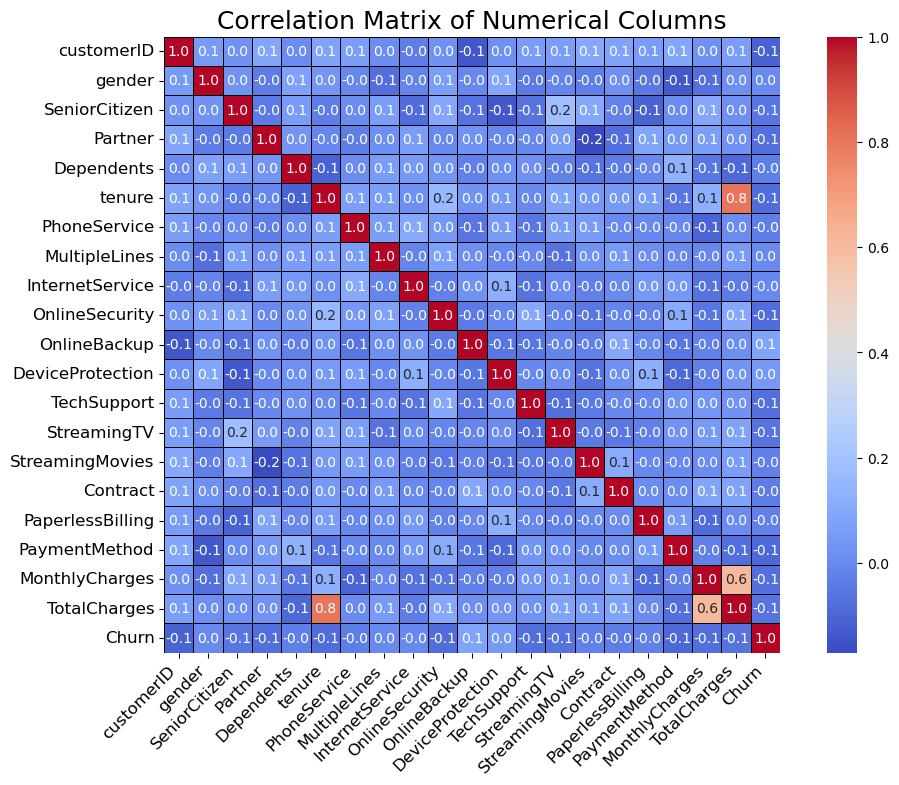

In [285]:
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5, linecolor='black', square=True)
plt.title('Correlation Matrix of Numerical Columns', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

## Selecting Features && Train Test Split

### Selecting Features

**Selecting Features (Target is Churn)**

In [289]:
X = dataset.drop('Churn',axis=1)
y = dataset['Churn']

In [290]:
X.shape, y.shape

((300, 20), (300,))

### Train Test Split

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Creating the sequential model

In [295]:
model = Sequential()

### Adding the input layer

In [297]:
model.add(Dense(units=10, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the hidden layers

In [299]:
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))

### Adding the output layer

In [301]:
model.add(Dense(units=1, activation='sigmoid'))

### Compiling the model

In [303]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Display model summary

In [327]:
model.summary()# explian the complexity's of the model you can see the result and answer

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675 (2.64 KB)

 Trainable params: 675 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting the model

In [329]:
model.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4685 - loss: 3.0849 - val_accuracy: 0.4792 - val_loss: 0.7365
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.4506 - loss: 0.7468 - val_accuracy: 0.4167 - val_loss: 0.7742
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5215 - loss: 0.7227 - val_accuracy: 0.3750 - val_loss: 0.7179
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.5098 - loss: 0.7067 - val_accuracy: 0.4167 - val_loss: 0.7717
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.5059 - loss: 0.7304 - val_accuracy: 0.4167 - val_loss: 0.7154
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.6301 - loss: 0.6821 - val_accuracy: 0.3958 - val_loss: 0.7785
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.4857 - loss: 0.7344 - val_accuracy: 0.5208 - val_loss: 0.7050
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.6182 - loss: 0.6946 - val_accura

## Evaluating the model

In [331]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5319 - loss: 0.7545


[0.7580370306968689, 0.5166666507720947]